In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
#Read the data into a pandas Dataframe
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Looks like our data is very messy we have to clean our data before creating a prediction model for Delayed Flights.
Let's do it..!!!

In [21]:
df_final = df.drop(['Unnamed: 0','Year','Month','DayofMonth','CRSDepTime','ArrTime','CRSElapsedTime','CRSArrTime','FlightNum','TailNum','ActualElapsedTime','AirTime','DepDelay','Distance','TaxiIn','TaxiOut','Cancelled','CancellationCode','Diverted','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'],axis=1,inplace=True)

In [22]:
#having a peak to oue cleaned data
df.head(10)

,DayOfWeek,DepTime,UniqueCarrier,ArrDelay,Origin,Dest
0,4,2003.0,WN,-14.0,IAD,TPA
1,4,754.0,WN,2.0,IAD,TPA
2,4,628.0,WN,14.0,IND,BWI
3,4,1829.0,WN,34.0,IND,BWI
4,4,1940.0,WN,11.0,IND,JAX
5,4,1937.0,WN,57.0,IND,LAS
6,4,706.0,WN,1.0,IND,MCO
7,4,1644.0,WN,80.0,IND,MCO
8,4,1029.0,WN,11.0,IND,MDW
9,4,1452.0,WN,15.0,IND,PHX


In our sample data, we have data about airline delays, with the following columns:

ORIGIN (Origin Airport), 
DEST (Destination Airport), 
UNIQUE_CARRIER (Airline Carrier), 
DAY_OF_WEEK (Day of the Week), 
DEP_HOUR (Hour of Departure), 
ARR_DELAY (Arrival Delay in minutes),                
We will build a model to predict whether a flight is delayed more than 5 minutes or not, given the ORIGIN, DEST and UNIQUE_CARRIER

In [23]:
# First, we transform ARR_DELAY into a 1/0 format for Delay/No Delay
# For this we are going to use the Python Lambda function on the dataframe

df['ArrDelay'] = df['ArrDelay'].apply(lambda x:1 if x>=5 else 0)

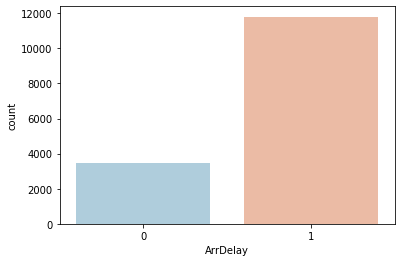

In [24]:
sns.countplot(x='ArrDelay', data=df,palette='RdBu_r')

In [25]:
#Convert Categorical Variables into Dummy Variables
df = pd.concat([df,pd.get_dummies(df['UniqueCarrier'],drop_first=True,prefix="UniqueCarrier")],axis=1)
df = pd.concat([df,pd.get_dummies(df['Origin'],drop_first=True,prefix="Origin")],axis=1)
df = pd.concat([df,pd.get_dummies(df['Dest'],drop_first=True,prefix="Dest")],axis=1)
df = pd.concat([df,pd.get_dummies(df['DayOfWeek'],drop_first=True,prefix="DayOfWeek")],axis=1)
df = pd.concat([df,pd.get_dummies(df['DepTime'],drop_first=True,prefix="DepTime")],axis=1)

In [26]:
#Drop the original Categorical Variables
df.drop(['Origin','Dest','UniqueCarrier','DayOfWeek','DepTime'],axis=1,inplace=True)

In [28]:
#Create the train and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('ArrDelay',axis=1), 
                                                    df['ArrDelay'], test_size=0.30, 
                                                    random_state=101)

In [29]:
from sklearn.linear_model import LogisticRegression

#Train the model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

#Predicting on the Test Set
predictions = logmodel.predict(X_test)

C:\Users\anurag.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
#Model Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

truePos = X_test[((predictions == 1) & (y_test == predictions))]
falsePos = X_test[((predictions == 1) & (y_test != predictions))]
trueNeg = X_test[((predictions == 0) & (y_test == predictions))]
falseNeg = X_test[((predictions == 0) & (y_test != predictions))]

TP = truePos.shape[0]
FP = falsePos.shape[0]
TN = trueNeg.shape[0]
FN = falseNeg.shape[0]

accuracy = float(TP + TN)/float(TP + TN + FP + FN)
print('Accuracy: '+str(accuracy))

              precision    recall  f1-score   support

           0       0.45      0.11      0.18       984
           1       0.80      0.96      0.87      3600

    accuracy                           0.78      4584
   macro avg       0.62      0.54      0.52      4584
weighted avg       0.72      0.78      0.72      4584

Accuracy: 0.7801047120418848


The model has an overall accuracy of 0.78, which is not too bad given the limited dataset on which we trained the model.

## Saving the Model using Pickle

In [31]:
import pickle

with open('logmodel.pkl', 'wb') as fid:
    pickle.dump(logmodel, fid,2)

In [33]:
#Save a dictionary of the index keys to make the dummy variables out of user input

#create a dataframe containing only the categorical variables. In our case, it is the entire dataset except the ARR_DELAY column
cat = df.drop('ArrDelay',axis=1)
index_dict = dict(zip(cat.columns,range(cat.shape[1])))

#Save the index_dict into disk
with open('cat', 'wb') as fid:
    pickle.dump(index_dict, fid,2)